In [1]:
import matplotlib
#matplotlib.use('svg') 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mjs_env import *
# read in the CBT values
with open('./CBT4.json','r') as f:
    CBT = json.load(f)
    
Gt_of_B = json.loads( codecs.open('Gt_of_B.json','r','utf-8').read() )
Gt_of_B = scipy.interpolate.interp1d(Gt_of_B['B'],Gt_of_B['Gt'],kind='linear',bounds_error=False, fill_value = ( Gt_of_B['Gt'][0], Gt_of_B['Gt'][-1] )  ,assume_sorted=True)
#'#00A6D6'
import IPython.core.display as display

In [3]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=['#00A6D6',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf'])

#this removes embedded fonts to reduce the file side of pdfs. 
#plt.rcParams['pdf.use14corefonts']= True
    
plt.rcParams['axes.grid'] = False

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size']= 8
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelpad'] = 0

plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05

plt.rcParams['ytick.major.size']=2
plt.rcParams['xtick.major.size']=2
plt.rcParams['ytick.minor.size']=1.5
plt.rcParams['xtick.minor.size']=1.5

plt.rcParams['ytick.major.width']=0.5
plt.rcParams['ytick.minor.width']=0.5
plt.rcParams['xtick.major.width']=0.5
plt.rcParams['xtick.minor.width']=0.5

plt.rcParams['grid.linewidth']=0.5

plt.rcParams['legend.handlelength'] =1# : 1      # the length of the legend lines
plt.rcParams['legend.handleheight'] =0.5#  : 0.7      # the height of the legend handle
plt.rcParams['legend.handletextpad']=0.6# : 0.8      # the space between the legend line and legend text
plt.rcParams['legend.borderaxespad']=0.3# : 0.5      # the border between the axes and legend edge
plt.rcParams['legend.columnspacing']=1.5# : 2.0      # column separation

#ytick.major.width    : 0.8    # major tick width in points
#ytick.minor.width    : 0.6    # minor tick width in points
plt.rcParams['ytick.major.pad'] = 3#    : 3.5      # distance to major tick label in points
plt.rcParams['ytick.minor.pad'] = 3#  : 3.4      # distance to the minor tick label in points
plt.rcParams['xtick.major.pad'] = 3#    : 3.5      # distance to major tick label in points
plt.rcParams['xtick.minor.pad'] = 3#  : 3.4      # distance to the minor tick label in points


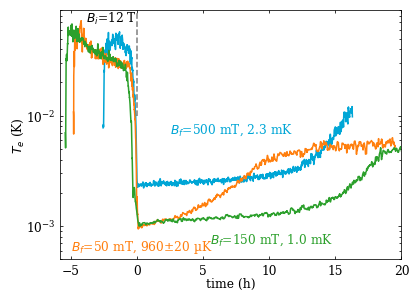

In [4]:
def fast_precool_comparason(ax):
    r = json.load(codecs.open('../processed/fast_precool_comparason.json'))
    tdf = pd.DataFrame(r['1'])
    ax.plot(tdf['t']/3600,smooth(tdf['Te'],11),color='C0')
    tdf = pd.DataFrame(r['2'])
    ax.plot(tdf['t']/3600,smooth(tdf['Te'],11),color='C1')
    tdf = pd.DataFrame(r['3'])
    ax.plot(tdf['t']/3600,smooth(tdf['Te'],11),color='C2')
    
    ax.set_yscale('log')
    
    ax.set_xlim(-5.8,20)
    ax.set_ylim(5e-4)
    ax.set_xlabel('time (h)')
    ax.set_ylabel('$T_e$ (K)')
    ax.annotate('$B_i$=12 T',xy=(0,70e-3),ha='right')
    ax.plot([0,0],[1e-2,1e-1],'--',color='grey')

    ax.annotate('$B_f$=500 mT, 2.3 mK',xy=(2.5,7e-3),color='C0')
    ax.annotate('$B_f$=50 mT, 960±20 µK',xy=(-5,0.6e-3),color='C1',ha='left')
    ax.annotate('$B_f$=150 mT, 1.0 mK ',xy=(5.5,0.7e-3),color='C2',ha='left')

    
ax1 =  plt.axes()
fast_precool_comparason(ax1)

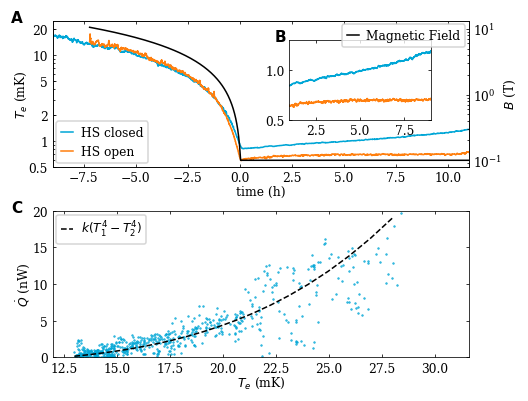

In [5]:
   
fig = plt.figure(figsize = (4.3,3.6),dpi=110)
gs = plt.GridSpec(nrows=2, ncols=1,hspace=0.3, width_ratios=[1], height_ratios=[1, 1],
                 left=0.1,right=0.98,top=0.95,bottom=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = plt.axes([.60, .7, .3, .2])# fig.add_subplot()
ax3 =  fig.add_subplot(gs[1,0])
timeoffset = -9
def A(ax):
    r = json.load(codecs.open('../processed/with_without_heatswitch_and_onchip.json'))
        
    ax.plot(np.array(r['HS open']['t'])+timeoffset,r['HS open']['T'],label='HS closed')
    ax.plot(np.array(r['HS closed']['t'])+timeoffset,r['HS closed']['T'],label='HS open')

    ax.set_xlim(timeoffset,20+timeoffset)
    ax.set_ylim(0.5,25)
    ax.set_yscale('log')
    ax.set_ylabel('$T_e$ (mK)');ax.set_xlabel('time (h)')

    y = [0.5,1,2,5,10,20]
    ax.set_yticks(y);
    ax.set_yticklabels(y)
    bax = ax.twinx()
    bax.semilogy(np.array(r['HS closed']['t'])+timeoffset,r['HS closed']['B'],'-',color="k",label='Magnetic Field')
    bax.set_ylabel('$B$ (T)')
    ax.legend(loc=3)
    bax.legend(loc=1)
    return bax

def B(ax):
    r = json.load(codecs.open('../processed/with_without_heatswitch_and_onchip.json'))
    for k in ['HS open','HS closed']:
        ax.plot(np.array(r[k]['t'])+timeoffset,r[k]['T'],label=k)
    
    ax.set_xlim(10+timeoffset,18+timeoffset)
    ax.set_ylim(0.5,1.3)
    ax.set_yscale('linear')
    #ax.set_ylabel('$T_e$ (mK)');ax.set_xlabel('time (h)')
    #ax.yaxis.set_minor_formatter(plt.NullFormatter())
    #y = [0.5,0.6,0.7,0.8,0.9,1]
    #ax.set_yticks(y);
    #ax.set_yticklabels(y)
    
def thermalysers_cooling_power(ax):
    r = json.load(codecs.open('../processed/precooling_power.json'))
    ax.plot(1e3*np.array(r['data']['Te'][::4]),
            smooth(smooth(r['data']['Qdot'],201)[::4],7),'.',
            markersize=1)
    ax.plot(1e3*np.array(r['model']['Te']),r['model']['Qdot'],'k--',
            label="$k(T_1^4-T_2^4)$")
    ax.set_ylim(0,20)
    ax.set_ylabel('$\dot{Q}$ (nW)')
    ax.set_xlabel('$T_{e}$ (mK)')
    ax.legend()
A(ax1)
B(ax2)
thermalysers_cooling_power(ax3)

ax1.annotate("A",xy=(-0.1,0.99),
             xycoords='axes fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )

ax2.annotate("B",xy=(-0.1,0.99),
             xycoords='axes fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )
ax3.annotate("C",xy=(-0.1,0.99),
             xycoords='axes fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )


plt.savefig('../plots/with_without_heatswitch_and_onchip.pdf',transparent=True)

/home/sarsby/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


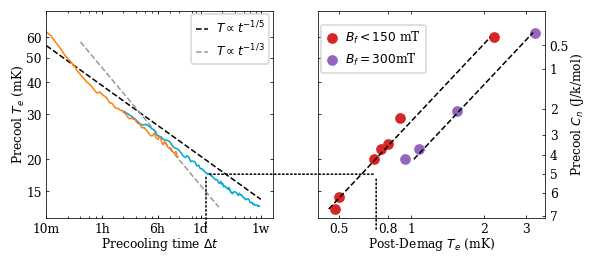

In [6]:

r = json.load(codecs.open('../processed/precooling_and_demag_performance.json'))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize = (5.85,2.5),dpi=110)


ax1.plot(np.log(r['model precool, T5']['t']),np.log(r['model precool, T5']['T']),'k--',label='$T\propto t^{-1/5}$')
ax1.plot(np.log(r['model precool, T3']['t']),np.log(r['model precool, T3']['T']),'--',color='#999999',label='$T\propto t^{-1/3}$')
ax1.plot( r['df0160']['t'],r['df0160']['T'],'-',label=None)
ax1.plot(r['df0184']['t'],r['df0184']['T'] ,'-',label=None)
ax1.legend()
ax1.set_ylabel('Precool $T_e$ (mK)')

xs = [10,15,20,30,40,50,60]
ax1.set_yticks(np.log(xs))
ax1.set_yticklabels(xs)
xticks = np.array([60*10,3600,6*3600,3600*24,3600*24*7])
xlabels = ['10m','1h','6h','1d','1w']
xticks = np.log(xticks)
ax1.set_xlim(xticks[0])
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)
ax1.set_xlabel('Precooling time $\Delta t$')
minor_ticks = [10*60,20*60,30*60,40*60,50*60,60*60,
               2*3600,3*3600,4*3600,5*3600,6*3600,
               9*3600,12*3600,18*3600,21*3600,24*3600,
               24*3600*2,24*3600*3,24*3600*4,24*3600*5,24*3600*6,24*3600*7,
              ]
ax1.set_xticks(np.log(minor_ticks),minor=True)

Tis = np.array([60,29,12.8,20,23,22,14.2])
Tfs = np.array([2.2,0.9,0.48,0.7,0.8,0.75,0.5])
ax2.plot(np.log(Tfs),np.log(Tis),'o',label='$B_f < 150$ mT',color='C3')
ax2.set_xlabel('Post-Demag $T_e$ (mK)')
xs = [0.3,0.5,0.8,1,2,3]
ax2.set_xticks(np.log(xs))
ax2.set_xticklabels(xs)
xs = [10,15,20,30,40,50,60]
ax2.set_yticks(np.log(xs))
ax2.set_yticklabels(xs)
ax3 = ax2.twinx()
ax3.yaxis.tick_right()
ax3.set_ylim( ax2.get_ylim() )
ax3.set_yticks(np.log(np.array(r['Precool C']['T'])*1e3))
ax3.set_yticklabels([str(el) for el in r['Precool C']['C']])
plt.grid('off')
ax3.set_ylabel('Precool $C_n$ (J/k/mol)')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.plot( r['fit100']['Te'] ,r['fit100']['Ts'],'k--')
ax2.plot(r['data300']['endT'],r['data300']['startT'],'o',label='$B_f =300$mT',color='C4')
ax2.plot( r['fit300']['Te'] ,r['fit300']['Ts'],'k--')
ax2.legend(loc=(0.01,0.7))
arrow_args = dict(arrowstyle="-",linestyle='dotted')
xs = 0.345
xe = 0.63
ym = 0.34
yl = 0.12
connection_linex = [xs,xs,xe,xe]
connection_liney = [yl,ym,ym,yl]
for i in range(3):
    plt.annotate('', xy=(connection_linex[i], connection_liney[i]), xycoords='figure fraction',
                 xytext=(connection_linex[i+1], connection_liney[i+1]), textcoords='figure fraction',
                 va="center",
                 arrowprops= arrow_args )



/home/sarsby/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


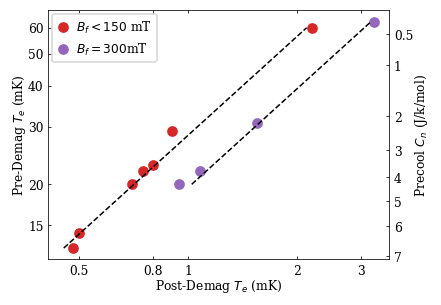

In [7]:
def plot_pre_post_demag_temp(ax):
    r = json.load(codecs.open('../processed/precooling_and_demag_performance.json'))

    

    xs = [10,15,20,30,40,50,60]

    xticks = np.array([60*10,3600,6*3600,3600*24,3600*24*7])
    xlabels = ['10m','1h','6h','1d','1w']
    xticks = np.log(xticks)
    ax.set_ylabel('Pre-Demag $T_e$ (mK)')
    ax.set_xlabel('Precooling time $\Delta t$')
    minor_ticks = [10*60,20*60,30*60,40*60,50*60,60*60,
                   2*3600,3*3600,4*3600,5*3600,6*3600,
                   9*3600,12*3600,18*3600,21*3600,24*3600,
                   24*3600*2,24*3600*3,24*3600*4,24*3600*5,24*3600*6,24*3600*7,
                  ]
    Tis = np.array([60,29,12.8,20,23,22,14.2])
    Tfs = np.array([2.2,0.9,0.48,0.7,0.8,0.75,0.5])
    ax.plot(np.log(Tfs),np.log(Tis),'o',label='$B_f < 150$ mT',color='C3')
    ax.set_xlabel('Post-Demag $T_e$ (mK)')
    xs = [0.3,0.5,0.8,1,2,3]
    ax.set_xticks(np.log(xs))
    ax.set_xticklabels(xs)
    xs = [10,15,20,30,40,50,60]
    ax.set_yticks(np.log(xs))
    ax.set_yticklabels(xs)
    ax3 = ax.twinx()
    ax3.yaxis.tick_right()
    ax3.set_ylim( ax.get_ylim() )
    ax3.set_yticks(np.log(np.array(r['Precool C']['T'])*1e3))
    ax3.set_yticklabels([str(el) for el in r['Precool C']['C']])
    plt.grid('off')
    ax3.set_ylabel('Precool $C_n$ (J/k/mol)')
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax.plot( r['fit100']['Te'] ,r['fit100']['Ts'],'k--')
    ax.plot(r['data300']['endT'],r['data300']['startT'],'o',label='$B_f =300$mT',color='C4')
    ax.plot( r['fit300']['Te'] ,r['fit300']['Ts'],'k--')
    ax.legend()
    return ax3
ax1 =  plt.axes()
plot_pre_post_demag_temp(ax1)

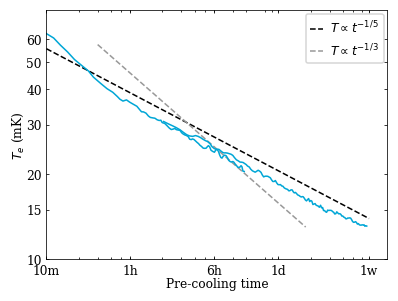

In [21]:
def precool_time(ax1):
    r = json.load(codecs.open('../processed/precooling_and_demag_performance.json'))

    ax1.plot(np.log(r['model precool, T5']['t']),np.log(r['model precool, T5']['T']),'k--',label='$T\propto t^{-1/5}$')
    ax1.plot(np.log(r['model precool, T3']['t']),np.log(r['model precool, T3']['T']),'--',color='#999999',label='$T\propto t^{-1/3}$')
    p = ax1.plot( r['df0160']['t'],r['df0160']['T'],'-',label=None)
    ax1.plot(r['df0184']['t'],r['df0184']['T'] ,'-',label=None,color=p[0].get_color())
    ax1.legend()
    ax1.set_ylabel('Temperature (mK)')

    xs = [10,15,20,30,40,50,60]
    ax1.set_yticks(np.log(xs))
    ax1.set_yticklabels(xs)
    xticks = np.array([60*10,3600,6*3600,3600*24,3600*24*7])
    xlabels = ['10m','1h','6h','1d','1w']
    xticks = np.log(xticks)
    ax1.set_xlim(xticks[0])
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xlabels)
    ax1.set_xlabel('Pre-cooling time')
    minor_ticks = [10*60,20*60,30*60,40*60,50*60,60*60,
                   2*3600,3*3600,4*3600,5*3600,6*3600,
                   9*3600,12*3600,18*3600,21*3600,24*3600,
                   24*3600*2,24*3600*3,24*3600*4,24*3600*5,24*3600*6,24*3600*7,
                  ]
    ax1.set_xticks(np.log(minor_ticks),minor=True);

ax1 =  plt.axes()
precool_time(ax1)

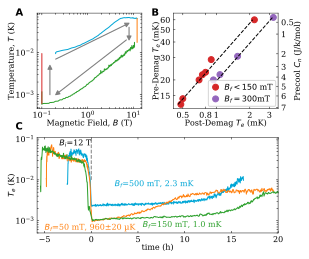

In [9]:
display.SVG(filename='../plots/fig_system_performance.svg')

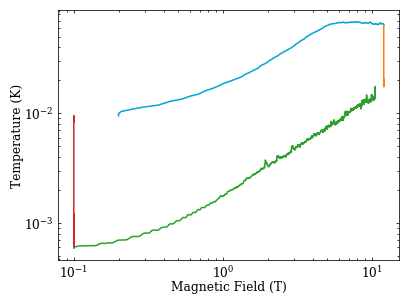

In [20]:
def plot_demag_cycle(ax):
    r = json.load(codecs.open('../processed/demag_cycle_example.json'))
    for k in r:
        ax.plot(r[k]["B"],r[k]["T"],label=k)
    ax.set_xlabel('Magnetic Field (T)')
    ax.set_ylabel('Temperature (K)')
    ax.set_xscale('log')
    ax.set_yscale('log')
ax1 =  plt.axes()
plot_demag_cycle(ax1)   


/home/sarsby/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


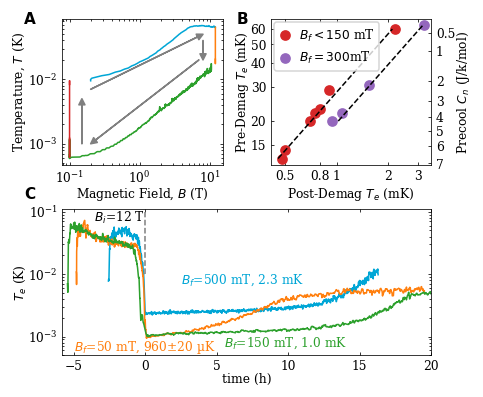

In [11]:
fig = plt.figure(figsize = (4.3,3.6),dpi=110)
gs = plt.GridSpec(nrows=2, ncols=2,hspace=0.3, wspace=0.3,width_ratios=[1,1], height_ratios=[1, 1],
                 left=0.12,right=0.90,top=0.95,bottom=0.1)
axtopleft = fig.add_subplot(gs[0,0])
axtopright = fig.add_subplot(gs[0,1])
axbottom =  fig.add_subplot(gs[1,:])

#axisbottom_b = A(axbottom)
plot_demag_cycle(axtopleft)
axtopright_b = plot_pre_post_demag_temp(axtopright)

fast_precool_comparason(axbottom)
axbottom.set_ylim(0.5e-3,11e-2)
arrowprops={"facecolor":'grey',"ec":"grey","width":0.08,"headwidth":4,"headlength":4}
axtopleft.annotate('',xy=(8,5e-2),xytext=(0.2,7e-3),
                  arrowprops=arrowprops)
axtopleft.annotate('',xy=(8,2e-2),xytext=(8,4e-2),
                  arrowprops=arrowprops)
axtopleft.annotate('',xy=(0.2,1e-3),xytext=(7,2e-2),
                  arrowprops=arrowprops)
axtopleft.annotate('',xy=(0.15,5e-3),xytext=(0.15,1e-3),
                  arrowprops=arrowprops)

axbottom.annotate("107 pW", xy=(7,1.3), xycoords='data',color="C0")
axbottom.annotate("34 pW", xy=(8,0.8), xycoords='data',color="C1")

#labelx = 1.15 # axes coords
#axisbottom_b.yaxis.set_label_coords(labelx, 0.5)
#axtopright_b.yaxis.set_label_coords(labelx, 0.5)

#fig.align_ylabels(axs=[axisbottom_b,axtopright_b])
fig.align_ylabels(axs=[axtopleft,axbottom])
fig.align_xlabels(axs=[axtopleft,axtopright])

for ax,cap,pos in zip([axtopleft,axtopright,axbottom],['A','C','B'], [ (0.05,0.94),(0.05,0.5),(0.49,0.94) ] ):
    ax.annotate(cap,xy=pos,
             xycoords='figure fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )
    
plt.savefig('../plots/fig_system_performance.svg',transparent=True)
plt.savefig('../plots/fig_system_performance.pdf',transparent=True)
plt.savefig('../plots/fig_system_performance.png',transparent=True)
#display.SVG(filename='../plots/fig_system_performance.svg')

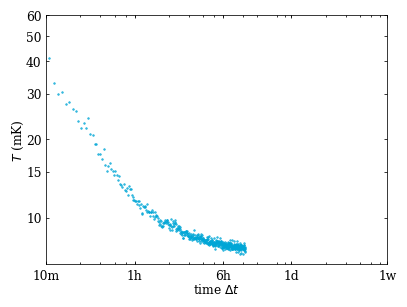

In [12]:
def fridge_relax_time(ax1):
    r = json.load(codecs.open('../processed/fridge_cooling_timeconstant.json'))
    # at 50mT from isothermal at 60mK
    
    ax1.plot( smooth(np.log(np.array(r['t/s'])),11)[::5],
             smooth(np.log(np.array(r['T/mK'])),11)[::5],'.',
            markersize=1)
    
    #ax1.plot(np.log(np.array(r['model t'])), 
    #                np.log(np.array(r['model T'])*1.1),'k--',label='$t^{-1/2}$')
    #trange = m.log_space(60*12,3600,11)
    #ax1.plot(np.log(trange), 
    #                np.log(3000*trange**(-2/3)),'--',color='#888888')
    #label='$T\propto t^{-2/3}$'
    #ax1.legend()

    xs = [10,15,20,30,40,50,60]
    ax1.set_yticks(np.log(xs))
    ax1.set_yticklabels(xs)
    xticks = np.array([60*10,3600,6*3600,3600*24,3600*24*7])
    xlabels = ['10m','1h','6h','1d','1w']
    xticks = np.log(xticks)
    ax1.set_xlim(xticks[0])
    ax1.set_ylabel('$T$ (mK)')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xlabels)
    ax1.set_xlabel('time $\Delta t$')
    minor_ticks = [10*60,20*60,30*60,40*60,50*60,60*60,
                   2*3600,3*3600,4*3600,5*3600,6*3600,
                   9*3600,12*3600,18*3600,21*3600,24*3600,
                   24*3600*2,24*3600*3,24*3600*4,24*3600*5,24*3600*6,24*3600*7,
                  ]
    ax1.set_xticks(np.log(minor_ticks),minor=True);
    #fridge time constant of MC cooling power.
ax1 = plt.axes()
fridge_relax_time(ax1)

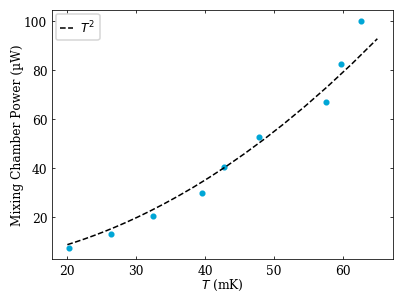

In [13]:
def fridge_cooling_power(ax1):
    r = json.load(codecs.open('../analysis/heater_calibration.json'))
    current = np.array(r['heater_setting'])*1e-6

    ax1.plot(r['CBT_temperature'],1e6*current**2*100,'.')

    ax1.set_yscale('linear')
    ax1.set_xscale('linear')
    xs = [20,40,60,80,100]
    ax1.set_yticks(xs)
    ax1.set_yticklabels(xs);
    xs = [15,20,30,40,50,60]
    ax1.xaxis.set_minor_formatter(plt.NullFormatter())
    ax1.set_xticks(xs)
    ax1.set_xticklabels(xs);
    ax1.set_ylabel('Mixing Chamber Power (µW)')
    ax1.set_xlabel('$T$ (mK)')
    ts = m.log_space(20,65,21)
    ax1.plot(ts,ts**2*0.022,'k--',label='$T^2$')
    #ax1.set_xlim(5,80)
    ax1.legend()
ax1 = plt.axes()
fridge_cooling_power(ax1)

#00A6D6


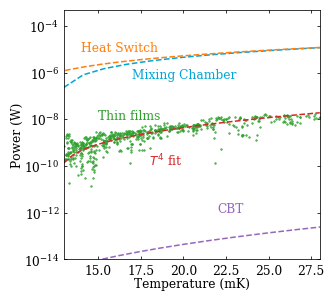

In [19]:
def combined_cooling_powers(ax1):
    r = json.load(codecs.open('../analysis/heater_calibration.json'))
    current = np.array(r['heater_setting'])*1e-6

    #ax1.plot(r['CBT_temperature'],current**2*100,'.')
    ts = m.log_space(10,65,21)
    #ax1.plot(ts,1e-6*ts**2*0.022,'--',label='Mixing chamber')
    p = ax1.plot([13.        , 14.13387163, 15.36664056, 16.7069327 , 18.16412631,
       19.74841766, 21.47089231, 23.34360275, 25.37965267, 27.59328868,
       30.        ],
            [2.33784454e-07, 8.07248449e-07, 1.48511115e-06, 2.28637826e-06,
       3.23351547e-06, 4.35307832e-06, 5.67645677e-06, 7.24075530e-06,
       9.08983325e-06, 1.12755345e-05, 1.38591411e-05],
            '--',label='Mixing chamber')
    ax1.set_yscale('log')
    ax1.set_xscale('linear')
    print(p[0].get_color())
    
    ax1.annotate('Mixing Chamber',xy=(17,0.55e-6),color = p[0].get_color())
    
    t_range = m.log_space(10e-3,40e-3,21)
    q_heat_switch = (t_range**2-10e-3**2) * 2.44e-8/2/7e-7
    p = ax1.plot(1e3*t_range, q_heat_switch, '--',label="Closed HS") #$k(T^2-($5mK$)^2$, Heat switch (open)
    
    ax1.annotate('Heat Switch',xy=(14,8e-6),color = p[0].get_color())
    
    
    #ax1.plot(1e3*t_range, q_heat_switch/800,'--', label="Closed HS")
    #xs = [20,40,60,80,100]
    #ax1.set_yticks(xs)
    #ax1.set_yticklabels(xs);
    #xs = [15,20,30,40,50,60]
    #ax1.xaxis.set_minor_formatter(plt.NullFormatter())
    #ax1.set_xticks(xs)
    #ax1.set_xticklabels(xs);
    #ax1.set_ylabel('Mixing Chamber Power (µW)')
    #ax1.set_xlabel('$T$ (mK)')
    
    #ax1.set_xlim(5,80)
    
    
    r = json.load(codecs.open('../processed/precooling_power.json'))
    p = ax1.plot(1e3*np.array(r['data']['Te'][::4]),
            1e-9*smooth(smooth(r['data']['Qdot'],201)[::4],7),'.',
            markersize=1,label='Thin films')
    ax1.annotate('Thin films',xy=(15,1e-8),color = p[0].get_color())
    
    
    p= ax1.plot(1e3*np.array(r['model']['Te']),1e-9*np.array(r['model']['Qdot']),'--',
            label="$T^4$ fit") #$k(T^4-($10mK$)^4)$
    ax1.annotate('$T^4$ fit',xy=(18,1e-10),color = p[0].get_color())
    
    #ax1.set_ylim(0,20)
    #ax1.set_ylabel('$\dot{Q}$ (nW)')
    #ax1.set_xlabel('$T_{e}$ (mK)')
    
    V = 140e-6*50e-6*25.4e-6
    Sigma =  8e7
    Q_island = Sigma * V * (t_range**5 - 10e-3**5)
    p = ax1.plot(1e3*t_range, Q_island, '--',label="CBT island")
    ax1.annotate('CBT',xy=(22,1e-12),color = p[0].get_color())
    
    #ax1.legend()
    ax1.set_ylim(1e-14)
    ax1.set_xlabel('Temperature (mK)')
    ax1.set_ylabel('Power (W)')
    ax1.set_xlim(13,28)
    
    
    
    
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(111)
combined_cooling_powers(ax1)

In [15]:
#parallel plate capacitor model.
C = 300e-12 # 200 pico farads.
E0 = 8.854e-12
k = 2.5 # dielectric constant of the polymer. guess
area = 7e-3*3e-2
d = k*E0*area/C
d*1e6

15.494499999999999

the heat capacity changes as $T^{-2}$, but the limiting cooling power scale with $T^4$, so, unlike with
galvanically connect refigerent there is much to gain by performing work at higher temperatures.


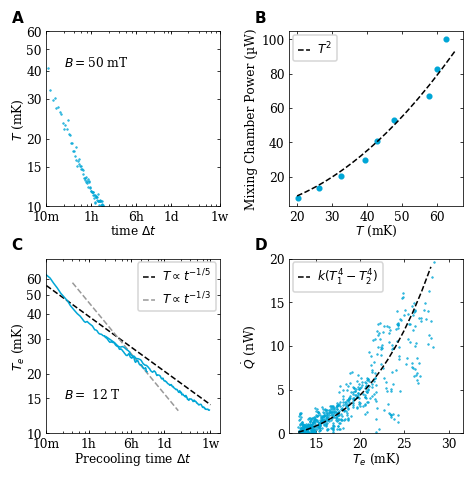

In [16]:
fig = plt.figure(figsize = (4.3,4.3),dpi=110)
gs = plt.GridSpec(nrows=2, ncols=2,hspace=0.3, wspace=0.4, width_ratios=[1,1], height_ratios=[1, 1],
                 left=0.1,right=0.98,top=0.95,bottom=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 =  fig.add_subplot(gs[1,0])
ax3 =  fig.add_subplot(gs[0,1])
ax4 =  fig.add_subplot(gs[1,1])


fridge_relax_time(ax1)
fridge_cooling_power(ax3)
precool_time(ax2)
thermalysers_cooling_power(ax4)

ax1.annotate('$B=$50 mT',xy=(0.1,0.8), xycoords='axes fraction')

ax2.annotate('$B =$ 12 T',xy=(0.1,0.2), xycoords='axes fraction')

labelx = -0.18 # axes coords
ax3.yaxis.set_label_coords(labelx, 0.5)
ax4.yaxis.set_label_coords(labelx, 0.5)

ax1.set_ylim(np.log(10))

for ax,cap in zip([ax1,ax3,ax2,ax4],['A','B','C','D']):
    ax.annotate(cap,xy=(-0.2,1.05),
             xycoords='axes fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )



The fridge can relax quickly from being held at 60mK during hours, A, using the substantial microwatts of cooling power, B. Cooling at high magnetic fields requires substantially more time to extract heat of magnetisation, C, due to the comparativlly weak coupling over the thin film thermalysers, D.

#00A6D6


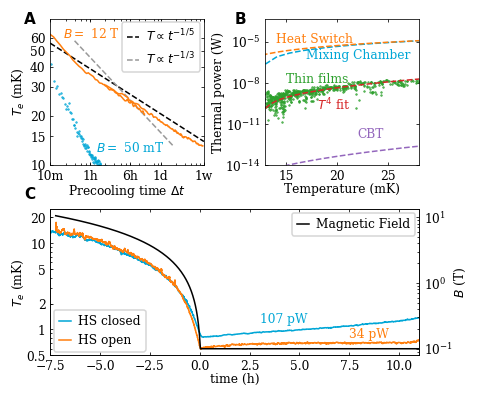

In [17]:

fig = plt.figure(figsize = (4.3,3.6),dpi=110)
gs = plt.GridSpec(nrows=2, ncols=2,hspace=0.3, wspace=0.4,width_ratios=[1,1], height_ratios=[1, 1],
                 left=0.12,right=0.90,top=0.95,bottom=0.1)
axtopleft = fig.add_subplot(gs[0,0])
axtopright = fig.add_subplot(gs[0,1])
axbottom =  fig.add_subplot(gs[1,:])


fridge_relax_time(axtopleft)
precool_time(axtopleft)

combined_cooling_powers(axtopright)
A(axbottom)
#thermalysers_cooling_power(ax4)

axbottom.annotate("107 pW", xy=(3,1.2),color="C0")
axbottom.annotate("34 pW", xy=(7.5,0.8), color="C1")
axbottom.set_xlim(-7.5,11)

axtopleft.annotate('$B=$ 50 mT',xy=(np.log(1.3*3600),np.log(12)),color='C0', xycoords='data')
axtopleft.annotate('$B=$ 12 T',xy=(np.log(0.3*3600),np.log(60)), xycoords='data', color='C1')

axtopleft.set_ylim(np.log(10))
#zip([axtopleft,axtopright,axbottom],['A','C','B'], [ (0.05,0.94),(0.05,0.5),(0.49,0.94) ] ):
fig.align_ylabels(axs=[axtopleft,axbottom])

    
for ax,cap,pos in zip([axtopleft,axtopright,axbottom],['A','C','B'],[ (0.05,0.94),(0.05,0.5),(0.49,0.94) ]):
    ax.annotate(cap,xy=pos,
             xycoords='figure fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )
plt.savefig('../plots/fig_cooling_power_time_constants.svg',transparent=True)
plt.savefig('../plots/fig_cooling_power_time_constants.pdf',transparent=True)
plt.savefig('../plots/fig_cooling_power_time_constants.png',transparent=True)
#display.SVG(filename='../plots/fig_cooling_power_time_constants.svg')

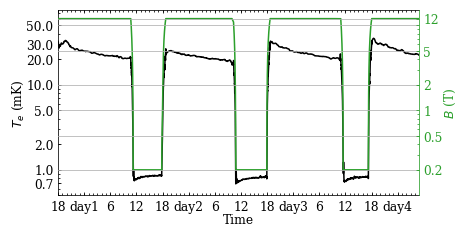

In [18]:
fig, ax1 = plt.subplots(figsize=(4.3,2.2),dpi=110)
ax2 = ax1.twinx()
offset = 1540243076.844
starttime = pd.to_datetime('2018-10-05T15:00')

tdf = pd.DataFrame(json.load(codecs.open('../processed/fast_cycling_data.json')))
ax2.plot( (tdf['epoch time']-offset)/3600, tdf['Magnetic Field / T'],'-',zorder=0,color='#2ca02c')
ax1.plot( (tdf['epoch time']-offset)/3600, smooth(tdf['Te'],13)*1000,'k-',zorder=35)

#for k in ult_cycle:
    
    #dates = matplotlib.dates.date2num( )
    
#    ax1.plot( (df[k]['epoch time']-offset)/3600, smooth(df[k]['Te'],13)*1000,'k-',label=k,zorder=3)
#    ax2.plot( (df[k]['epoch time']-offset)/3600, df[k]['Magnetic Field / T'],'-',label=k,zorder=2,color='#2ca02c')
#ax2.set_ylabel('$T_e$ / mK')
#ax1.set_ylabel('$B$ / T')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Time')
#plt.xlim(0,30)
#ax2.set_ylim(10,20)
#plt.legend()
ax2.tick_params('y', colors='#2ca02c',which='both')
#ax2.tick_params('y', colors='#2ca02c',minor=True)
ax2.spines['right'].set_color('#2ca02c')
#ax2.spines['top'].set_color('red')
#ax2.yaxis.label.set_color('red')
#ax2.tick_params(axis='x', colors='red')


x_ticks = np.arange(-6,3.2*24,6)
x_strings = [''] * len(x_ticks)
for i,x in enumerate(x_ticks):
    if x%24 == 0:
        x_strings[i] = 'day'+ str(int(x/24)+1)
    else:
        x_strings[i] = str(int(x%24))
        
plt.xticks(x_ticks,x_strings);
minor_x_ticks = np.arange(-12,3.2*24,1)

ax2.set_xticks(minor_x_ticks,minor=True);
ax2.set_ylabel('$B$ (T)',color='#2ca02c')
ax1.set_ylabel('$T_e$ (mK)')
ax2.set_xlabel('Time')


plt.xlabel('Time $t$')
plt.grid()

ax2.set_xlim(-6,3.2*24)
ax1.set_xlim(-6,3.2*24)

ax2.set_yticks([0.2,0.5,1,2,5,10,12])
ax2.set_yticklabels(['0.2','0.5','1','2','5','','12'])
ax2.set_ylim(0.1,15)

ax1.set_yticks([0.7,1.0,2,5,10,20,30,50])
ax1.set_yticklabels(['0.70','1.0','2','5','10','20','30','50'])
ax1.set_ylim(0.5,15*5)

# draw faint line at 700uK.
#ax1.plot([-6,3.2*24],[0.7,0.7],'-',color='grey',linewidth=0.5)

plt.tight_layout()
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.savefig('../plots/daily_cold_cycle.png')
#plt.xticks([0,24,2*24,3*24],['Day 0','Day 1','Day 2',' Day 3'])
#plt.title('Fast demag cycle')

#ax2.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.spines['right'].set_visible(True)
ax1.spines['right'].set_visible(False)


plt.savefig('../plots/fig_fast_cycle.png',transparent=True)
plt.savefig('../plots/fig_fast_cycle.svg',transparent=True)
plt.savefig('../plots/fig_fast_cycle.pdf',transparent=True)